In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Load dataset
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Display basic info
print("First 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue 

In [3]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-n

In [4]:
# Select relevant numerical columns for clustering
# We can use sales, quantity, and price-related features
num_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']
data = df[num_features]



In [5]:
# Handle missing values if any
data = data.dropna()

In [6]:
# Scale the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [7]:
# ELBOW METHOD
inertia = []
K = range(1, 11)
#Inertia = Sum of Squared Distances (SSD)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

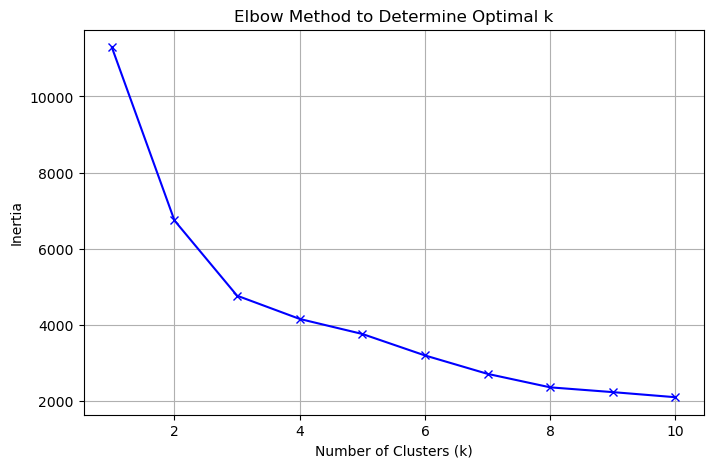

In [8]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

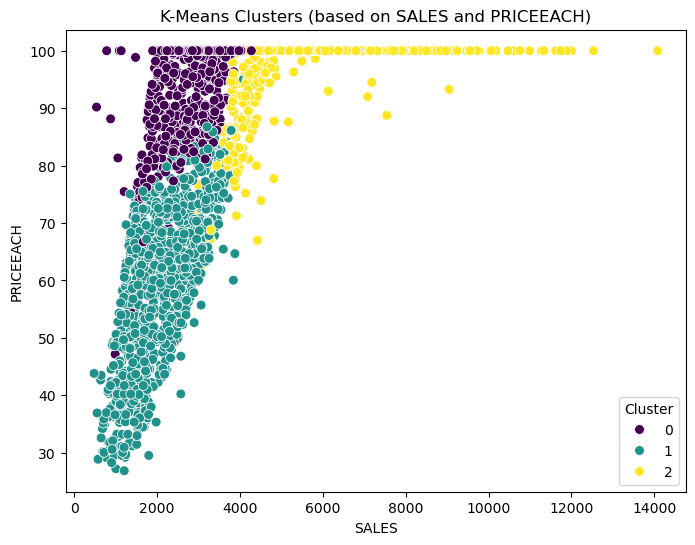

In [9]:
optimal_k = 3  # (You can choose based on elbow curve)

# Apply KMeans with optimal clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data['SALES'], y=data['PRICEEACH'],
    hue=df['Cluster'], palette='viridis', s=50
)
plt.title('K-Means Clusters (based on SALES and PRICEEACH)')
plt.xlabel('SALES')
plt.ylabel('PRICEEACH')
plt.legend(title='Cluster')
plt.show()

In [10]:
cluster_summary = df.groupby('Cluster')[num_features].mean()
print("\nCluster Summary (Average values per cluster):")
print(cluster_summary)


Cluster Summary (Average values per cluster):
         QUANTITYORDERED  PRICEEACH        SALES        MSRP
Cluster                                                     
0              27.610832  95.432046  3123.730140  113.229689
1              35.208205  59.551169  2101.076482   64.145641
2              43.726204  97.485229  5722.350564  127.952996
